In [108]:
import sys
import os
import time
import random
import json
from datetime import timezone, datetime
import string
import uuid
from uuid import UUID
import pandas as pd
import seaborn as sns

In [109]:
def random_generator(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for x in range(size))

def random_hexgenerator():
    hexN="0x"+uuid.uuid4().hex
    return hexN[:18]
def timestamp_gen():
    ts=int(datetime.now(tz=timezone.utc).timestamp() * 1000)
    return ts

In [110]:
import elasticsearch
es = elasticsearch.Elasticsearch()

write_readings={}
 
documents_number = 20000 * 200000
j=0
itr=0
MAX_ITR=15
total_docs=0

In [111]:
startf = datetime.now();
while itr<MAX_ITR: 
    start = datetime.now();
    for index1 in range(documents_number):
        
        try:
            u=str(uuid.uuid1())
            value = random.randint(1,90000)
            syscall_nr=random_generator(4,'12345')
            syscall_name=random_generator(6,"abcdefghijklmnopqrstuvwxyz")
            dtb=random_hexgenerator()
            rsp=random_hexgenerator()
            rip=random_hexgenerator()
            pid=random.randint(1,10000)
            vmid="vm"+random_generator(2,'1234')
            logtype=random_generator(3,'xyz')
            
            es.index(index='elastic_perf', doc_type='logtype', id=u, body={
                'id': u,
                'value': value,
                'syscall_nr': syscall_nr,
                'syscall_name': syscall_name,
                'dtb': dtb,
                'rsp':rsp,
                'rip':rip,
                'pid':pid,
                'vmid':vmid,
                'logtype':logtype
            })
            
            
            #calculate the time for the insert
            timec=int((datetime.now() - start).total_seconds())

            if timec==1:
                #print (timec, 'secs for',index)
                
                j=j+1
                write_readings[j]=index1
                #f.write("%d,%d\n" %(j, index))
                itr=itr+1
                
                total_docs=total_docs + index1
                break
                   
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
print ('inserted ',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')
print ('average inserts per second is :',total_docs/MAX_ITR)

inserted  3767  in  15.079519 s
average inserts per second is : 251.13333333333333


In [112]:
res = es.search(index="elastic_perf",body={"from":0,"size":1000,"query": {"match_all": {}}})
print("%d documents found" % res['hits']['total'])

#for doc in res['hits']['hits']:
 #       print (" Doc ID: %s" % (doc['_id']))

12494 documents found


In [113]:
'''query={"query": {"match_all": {}}}
scanResp= es.search(index="elastic_perf", doc_type="logtype", body=query, search_type="scan", scroll="1m")  

response_tmp = es.scroll(scroll_id=scrollId, scroll= "1m")
scrollId = response_tmp['_scroll_id']
print (response_tmp)'''

'query={"query": {"match_all": {}}}\nscanResp= es.search(index="elastic_perf", doc_type="logtype", body=query, search_type="scan", scroll="1m")  \n\nresponse_tmp = es.scroll(scroll_id=scrollId, scroll= "1m")\nscrollId = response_tmp[\'_scroll_id\']\nprint (response_tmp)'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c7783128>],
      dtype=object)

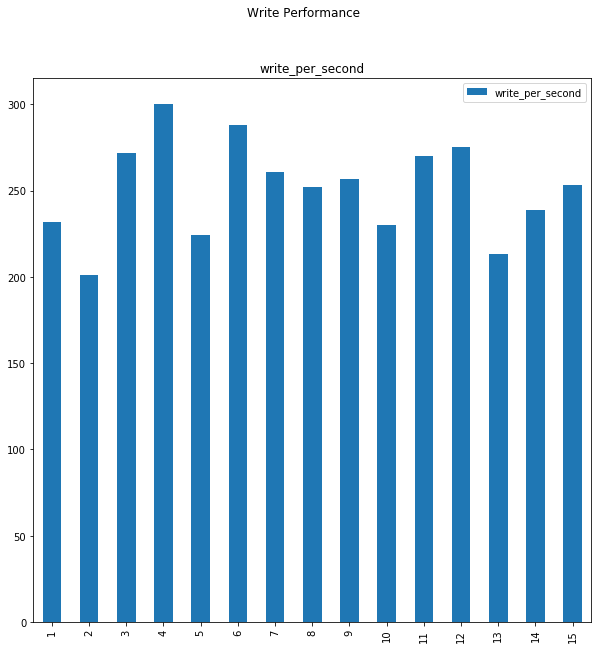

In [114]:
producer_df = pd.DataFrame.from_dict(write_readings, orient='index').rename(columns={0: 'write_per_second'})
producer_df.sort_index(inplace=True)
producer_df
producer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Write Performance")